In [1]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import random

In [2]:
# 3 months worth of data = 3 months * 30 days * 240 customers a day = 21600

# features: id, waiting time(info), rating(info), price_paid, haircut_duration(info), time_of_day, gender, distance(info)
# https://bestrandoms.com/random-address-in-sg

In [3]:
#ideal situation pre-scaling and cleaning

#id can be given later, after data is made
#waiting time (important), values: [0min to 90min]
#rating(important), values: [0 to 5]
#price_paid, values: [3.8 to 20]
#haircut_duration(important), values: [6min to 40min]
#time_of_day, values: [0min to 570min]
#gender, values: [0 or 1]
#distance(important), values: [0.5km to 10km, might need binning]

In [4]:
X, y = make_classification(n_samples = 21600,
                           n_features = 6,
                           n_informative = 4,
                           weights = [0.17, 0.83],
                           random_state = 2022)

In [5]:
X = pd.DataFrame(X, columns=["price_paid", "waiting_time", "rating", "haircut_duration", "time_of_day", "distance"])
X["is_male"] = random.choices([0, 1], weights = (20, 80), k = 21600) #add gender afterwards
X.head()

,price_paid,waiting_time,rating,haircut_duration,time_of_day,distance,is_male
0,-0.630637,1.420384,-0.670000,-1.822945,2.332295,-0.001568,1
1,-0.796216,0.349179,-0.336736,-1.365355,1.288682,-0.192202,1
2,-0.716891,-0.282770,-0.476735,-0.224167,-1.708531,0.346198,1
3,2.273020,2.188449,-1.002937,2.979551,-2.397965,1.794880,1
4,-0.322733,2.405728,-1.436030,-1.213401,0.252456,1.003801,1


In [6]:
X.describe()

,price_paid,waiting_time,rating,haircut_duration,time_of_day,distance,is_male
count,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000
mean,-0.207671,0.817783,-0.817824,-0.195918,0.003596,0.477151,0.792222
std,1.217049,1.339397,1.311672,1.549597,1.685753,0.820286,0.405726
min,-6.841063,-5.366796,-5.831749,-6.064179,-7.058104,-3.339446,0.000000
25%,-0.865177,-0.034017,-1.676317,-1.300914,-1.177231,-0.030620,1.000000
50%,-0.436619,0.858962,-0.882609,-0.346369,0.069342,0.517042,1.000000
75%,0.455233,1.709619,-0.047404,0.814059,1.202084,1.046978,1.000000
max,7.887378,6.593471,7.003742,6.320353,6.253410,3.579079,1.000000


array([[<AxesSubplot:title={'center':'price_paid'}>,
        <AxesSubplot:title={'center':'waiting_time'}>,
        <AxesSubplot:title={'center':'rating'}>],
       [<AxesSubplot:title={'center':'haircut_duration'}>,
        <AxesSubplot:title={'center':'time_of_day'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'is_male'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

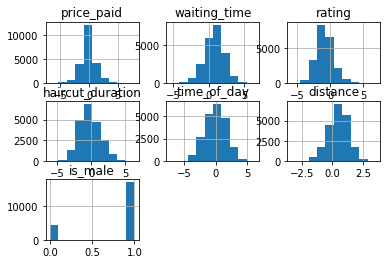

In [7]:
X.hist()

In [8]:
y = pd.DataFrame(y, columns=["Repeat"])
y.head()

,Repeat
0,1
1,1
2,1
3,1
4,1


In [9]:
y.value_counts()

Repeat
1         17863
0          3737
dtype: int64

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import RFE

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2022)

In [12]:
X_train.head()

,price_paid,waiting_time,rating,haircut_duration,time_of_day,distance,is_male
6073,-0.776041,0.590934,-1.763610,0.111311,0.450212,0.627938,1
16604,-1.144009,-0.496029,-1.014240,-0.403962,1.622978,-0.221885,1
11448,-0.807151,-0.827816,-0.267055,-0.283524,0.529334,-0.323049,1
559,1.387102,2.062722,-1.478439,2.006481,-0.343945,1.389078,1
20734,-0.333672,1.052508,-0.937502,-0.540363,0.594363,0.435431,1


In [13]:
clf = LogisticRegression(random_state = 2022)
clf.fit(X_train, y_train.values.ravel())

LogisticRegression(random_state=2022)

In [14]:
clf.coef_

array([[ 0.06219764,  0.30185848, -0.35576705,  0.20803209,  0.08563749,
         0.20789319,  0.06058389]])

In [15]:
y_pred = clf.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))

Testing accuracy 0.8171296296296297


In [16]:
rfe = RFE(clf, n_features_to_select=4)
fit = rfe.fit(X, y.values.ravel())
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

selected = fit.support_

#get the top-3 feature_names
feature_names = X.columns
print(feature_names.to_numpy()[selected])

Num Features: 4
Selected Features: [False  True  True  True False  True False]
Feature Ranking: [3 1 1 1 2 1 4]
['waiting_time' 'rating' 'haircut_duration' 'distance']
